# Assignment 2 - Reproducible Data Analysis of College Rankings

This skeleton notebook lays out the various questions and tasks that you need to undertake.

Essential links:
- College Scorecard: https://collegescorecard.ed.gov/
- College Scorecard Data: https://collegescorecard.ed.gov/data/ (Use the data linked as "Most Recent Data" under "Featured Downloads")
- Full data documentation: https://collegescorecard.ed.gov/assets/FullDataDocumentation.pdf (**Be sure to read this carefully as it defines what the columns mean**)
- Data dictionary: https://collegescorecard.ed.gov/assets/CollegeScorecardDataDictionary.xlsx (Definitions of abbreviations, variable names, possible values for each variable, etc.)

Additional links:
- Some background context on the college scorecard: http://www.nytimes.com/2015/09/13/us/with-website-to-research-colleges-obama-abandons-ranking-system.html
- College Scorecard StackExchange: http://opendata.stackexchange.com/questions/tagged/collegescorecard


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#import dataset
dataset=pd.read_csv("data3.csv")

# Makes it so that you can scroll horizontally to see all columns of an output DataFrame
pd.set_option('display.max_columns', None)

# This magic function allows you to see the charts directly within the notebook. 
%matplotlib inline

# This command will make the plots more attractive by adopting the commone style of ggplot
matplotlib.style.use("ggplot")

In [3]:
dataset.shape

(7703, 1744)

### 1. What percentage of undergraduate degree-seeking students attend "private for-profit" schools?

In [4]:
#creating new Dataframe named Q1_df with following selected columns

#INSTM: Institute name
#UGDS: Enrollment of undergraduate certificate/degree-seeking students
#CONTROL: Control of institution

Q1_df=dataset[['INSTNM','UGDS','CONTROL']]
#Total number of undergrad students will be obtained by adding numbers of column UGDS
total=Q1_df["UGDS"].sum()
print "Total number of under graduate degree seeking students is",total

#limiting the data set to "private for profit" by putting CONTROL =3
Q11_df=Q1_df[Q1_df['CONTROL']==3]
#Total number of undergrad students attending "private for profit" will be obtained by adding numbers in column UGDS in Q11_df 
total1=Q11_df["UGDS"].sum()
print "Total number of under graduate degree seeking students is",total1

percent=float(total1/total)*100
#truncate the percent to 2 decimal points
percent=str(float("{0:.2f}".format(percent)))
print"-----The percentage of undergraduate degree-seeking students attending private for-profit schools is "+percent+"%"

Total number of under graduate degree seeking students is 16301791.0
Total number of under graduate degree seeking students is 1647094.0
-----The percentage of undergraduate degree-seeking students attending private for-profit schools is 10.1%


### 2. In comparing predominently four-year "public", "private non-profit", and "private for-profit" schools which type of school has the highest median completion rate for students? Create a bar chart that shows the comparison (be sure to use appropriately labeled axes, tick marks, title, and colors). 
Note: Define completion rate as those students completing within 150% of the expected time for completion. 

In [5]:
#Creating new data frame with columns C150_4 (completion rate for four year students) and control
#INSTM: Institute name
#C150_4: completion rate for four year students 
#CONTROL: Control of institution
Q2_df=dataset[['INSTNM','CONTROL','C150_4']]

#limiting the data set to "private for profit" by putting control =3
Q21_df=Q2_df[Q2_df['CONTROL']==3]
median_PrivateForProfit=Q21_df["C150_4"].median()
print"Median of completion rate for students attending private for profit institutes is ",median_PrivateForProfit 

#limiting the data set to "public" by putting control =1
Q22_df=Q2_df[Q2_df['CONTROL']==1]
median_Public=Q22_df["C150_4"].median()
print"Median of completion rate for students attending public institutes is ",median_Public 

#limiting the data set to "private non profit" by putting control =2
Q23_df=Q2_df[Q2_df['CONTROL']==2]
median_PrivateNonProfit=Q23_df["C150_4"].median()
print"Median of completion rate for students attending private non profit institutes is ",median_PrivateNonProfit

#to find maximum number creating a list
list=[]
list.insert(0,median_PrivateForProfit)
list.insert(1,median_Public)
list.insert(2,median_PrivateNonProfit)

print "Highest median completion rate out of three types of institute is for private non profit institutes with a median of ",max(list)


Median of completion rate for students attending private for profit institutes is  0.3418
Median of completion rate for students attending public institutes is  0.44355
Median of completion rate for students attending private non profit institutes is  0.5352
Highest median completion rate out of three types of institute is for private non profit institutes with a median of  0.5352


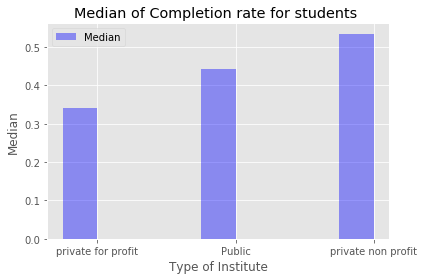

In [6]:
#Bar chart
#http://matplotlib.org/examples/pylab_examples/barchart_demo.html
import numpy as np
import matplotlib.pyplot as plt
n_groups = 3
median = (0.3418, 0.44355, 0.5352)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.4
rects1 = plt.bar(index, median, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Median')
plt.xlabel('Type of Institute')
plt.ylabel('Median')
plt.title('Median of Completion rate for students ')
plt.xticks(index + bar_width / 2, ('private for profit', 'Public', 'private non profit'))
plt.legend()

plt.tight_layout()
plt.show()

### 3. Among predominently four-year schools (i.e. bachelor's degree granting), what is the median debt of graduates in dollars? Do men or women typically have higher median debt and by how much?
Hint: You will need to do some filtering away of rows that are not "PrivacySuppressed" otherwise you won't be able to calculate the median value

In [7]:
#Subsetting dataset 
# GRAD_DEBT_MDN : Median loan debt of completers in monthly payments (10-year amortization plan)
# FEMALE_DEBT_MDN :median debt of female students
# MALE_DEBT_MDN : median debt of male students
# PREDDEG :Predominant degree awarded
Q3_df=dataset[['INSTNM','GRAD_DEBT_MDN','FEMALE_DEBT_MDN','MALE_DEBT_MDN','PREDDEG']]
Q3_df.head(2)

,INSTNM,GRAD_DEBT_MDN,FEMALE_DEBT_MDN,MALE_DEBT_MDN,PREDDEG
0,Alabama A & M University,33888,17500,14331,3
1,University of Alabama at Birmingham,21941.5,14725,14000,3


In [8]:
#limitting the dataset to only bachelor degree granting institute by  putting PREDEG=3
Q31_df=Q3_df[Q3_df['PREDDEG']==3]

#Filtering PrivacySuppressed out of Grad_debt_mdn Column storing in new dataframe
Q32_df=Q31_df[Q31_df['GRAD_DEBT_MDN'] !="PrivacySuppressed"]
#Calculating median 
median_debt= Q32_df["GRAD_DEBT_MDN"].median()
print "Median debt of graduates after graduating from a 4 year institute is $" ,median_debt


#Female
#Filtering PrivacySuppressed out of Female_debt_mdn Column storing in new dataframe
Q3F_df=Q32_df[Q32_df['FEMALE_DEBT_MDN'] !="PrivacySuppressed"]
#Calculating median 
median_Femaledebt= Q3F_df["FEMALE_DEBT_MDN"].median()
print "Median debt of  Female graduates after graduating from a 4 year institute is $" ,median_Femaledebt

#Male
#Filtering PrivacySuppressed out of male_debt_mdn Column storing in new dataframe
Q3M_df=Q32_df[Q32_df['MALE_DEBT_MDN'] !="PrivacySuppressed"]
#Calculating median 
median_maledebt= Q3M_df["MALE_DEBT_MDN"].median()
print "Median debt of Male graduates after graduating from a 4 year institute is $" ,median_maledebt

#to determine which median is greater male or female
A= max(median_Femaledebt,median_maledebt)
B= min(median_Femaledebt,median_maledebt)
Difference= str(A-B)
print"The difference between medians debt of Female graduates and male graduates is $"+Difference+", Female graduates have higher median debt."

Median debt of graduates after graduating from a 4 year institute is $ 25000.0
Median debt of  Female graduates after graduating from a 4 year institute is $ 16901.0
Median debt of Male graduates after graduating from a 4 year institute is $ 15250.0
The difference between medians debt of Female graduates and male graduates is $1651.0, Female graduates have higher median debt.


### 4. How do predominently four-year schools compare to predominently two-year schools in terms of the percentage of students who are in default of their loan within three years of graduation? Amongst all four-year schools which school had the highest percentage of such students?


In [9]:
Q4_df=dataset[['INSTNM','PREDDEG','CDR3','CDR3_DENOM']]

#subsetting dataset for 4 year school
Fouryear_df=Q4_df[Q4_df['PREDDEG']==3]
#removing null values
Fouryear_df = Fouryear_df[np.isfinite(Fouryear_df['CDR3'])]
Fouryear_df = Fouryear_df[np.isfinite(Fouryear_df['CDR3_DENOM'])]

#subsetting dataset for 2 year school
Twoyear_df= Q4_df[Q4_df['PREDDEG']==2]
#removing null values
Twoyear_df = Twoyear_df[np.isfinite(Twoyear_df['CDR3'])]
Twoyear_df = Twoyear_df[np.isfinite(Twoyear_df['CDR3_DENOM'])]

# Comparing 4 year school students with that of 2 year school students based on default loan in 3 years of graduation
print "**Comparing 4 year school students with that of 2 year school students based on default loan in 3 years of graduation.**"
print ""
print "Descriptive Statistics of percentage of students who are in default of their loan within three years of graduation from 4 year schools"
print Fouryear_df.describe()
print ""
print "Descriptive Statistics of percentage of students who are in default of their loan within three years of graduation from 2 year schools"
print Twoyear_df.describe()

**Comparing 4 year school students with that of 2 year school students based on default loan in 3 years of graduation.**

Descriptive Statistics of percentage of students who are in default of their loan within three years of graduation from 4 year schools
       PREDDEG         CDR3     CDR3_DENOM
count   2003.0  2003.000000    2003.000000
mean       3.0     0.076622    7080.183225
std        0.0     0.055632   28033.837341
min        3.0     0.000000      11.000000
25%        3.0     0.036000     378.000000
50%        3.0     0.061000     925.000000
75%        3.0     0.108000    2845.500000
max        3.0     0.329000  201163.000000

Descriptive Statistics of percentage of students who are in default of their loan within three years of graduation from 2 year schools
       PREDDEG         CDR3    CDR3_DENOM
count   1388.0  1388.000000   1388.000000
mean       2.0     0.162903   9766.188761
std        0.0     0.067757  20999.602045
min        2.0     0.000000     11.000000
25%       

In [10]:
print "Following school has the highest percentage students who are in default of their loan within three years of graduation from a 4 year schools "
Fouryear_df.max()

Following school has the highest percentage students who are in default of their loan within three years of graduation from a 4 year schools 


INSTNM        Youngstown State University
PREDDEG                                 3
CDR3                                0.329
CDR3_DENOM                         201163
dtype: object

### 5. Create two histogram charts in order to compare the distribution of annual cost of attendance for four-year schools and two-year schools (be sure to include appropriate axes, labels, and titles on the charts).

In [11]:
# Subsetting dataset based on instituute name ,predominant degree given and cost of attendance of the college .
Q5_df=dataset[['INSTNM','PREDDEG','COSTT4_A']]

#subsetting dataset for 4 year school
F_df=Q5_df[Q5_df['PREDDEG']==3]

#subsetting dataset for 2 year school
T_df=Q5_df[Q5_df['PREDDEG']==2]

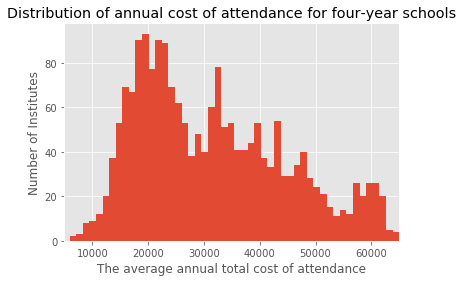

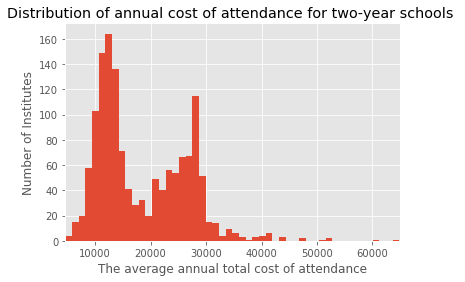

In [12]:
#4 year school graph
axes = F_df.hist(column="COSTT4_A", bins=50)
axes[0][0].set_xlim([5000,65000])
plt.xlabel('The average annual total cost of attendance')
plt.ylabel('Number of Institutes')
plt.title('Distribution of annual cost of attendance for four-year schools')


#2 year school graph
axes2 = T_df.hist(column="COSTT4_A", bins=50)
axes2[0][0].set_xlim([4610,65000])

plt.xlabel('The average annual total cost of attendance')
plt.ylabel('Number of Institutes')
plt.title('Distribution of annual cost of attendance for two-year schools ')

### 6. Your Own Data-Driven Insight
Come up with a unique insight by analyzing the data in a way that hasn't been considered in the previous questions. You might examine other variables or charting options for instance. **Your insight should be easily stated in a sentence or two, or captured by a chart that could be similarly explained in a caption.** Try to think like a journalist: Spend some time trying to make your insight something that could be a headline for a news article - that could entail some type of surprising result, social inequity, or implication for education policy. Be sure to show your entire code and process for deriving your insight. 

In [37]:
#Find relationship between locale of an institute and instate and out state fees.
#create a subset of data with institute name ,type of locale ,instate and outstate fees.
Q6_df=dataset[['INSTNM','LOCALE','TUITIONFEE_IN','TUITIONFEE_OUT']]
#Limimting the dataset to only 4 types of locality 
Q6new_df=Q6_df.loc[Q6_df['LOCALE'].isin([11,21,31,41])]
Q6new_df.head(2)

,INSTNM,LOCALE,TUITIONFEE_IN,TUITIONFEE_OUT
7,Athens State University,31.0,NaN,NaN
11,Chattahoochee Valley Community College,41.0,4320.0,7710.0


In [39]:
#replacing the numbers with respective locality according to data dictionary
df1=Q6new_df.replace(31, 'Town')
df2=df1.replace(41, 'Rural')
df3=df2.replace(21, 'Suburb')
df4=df3.replace(11, 'City')


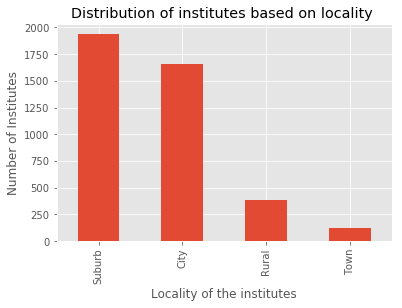

In [43]:
#histogram depicting number of institutes in different locality
df4.LOCALE.value_counts().plot.bar()
plt.xlabel('Locality of the institutes')
plt.ylabel('Number of Institutes')
plt.title('Distribution of institutes based on locality ')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000016620D30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A00D898>]], dtype=object)

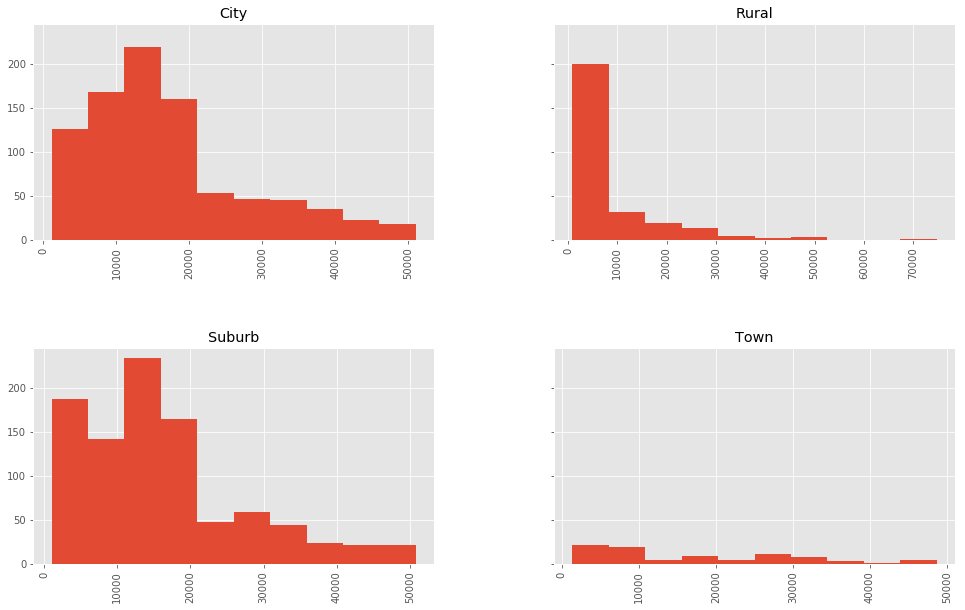

In [42]:
#Histograms depicting instate tution fees based on location
df4.hist(column="TUITIONFEE_IN", by="LOCALE", figsize=(16,10), sharey=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000154ADB38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001303E2E8>]], dtype=object)

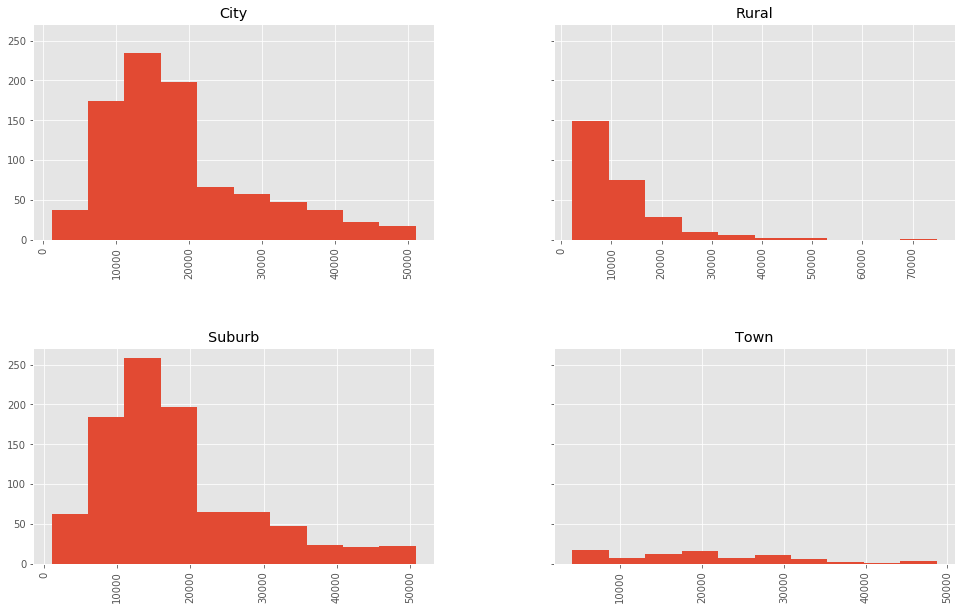

In [40]:
#Histograms depicting out of state tution fees based on location
df4.hist(column="TUITIONFEE_OUT", by="LOCALE", figsize=(16,10), sharey=True)

In [50]:
#INSIGHTS
print "*-*-*----*- INSIGHTS*-*--*-*-*-*"
print "- From the histograms its very clear that institutes which are located at Rural locations have lower instate and out of state tution fees as compared to institutes located in other areas. Majority of the institues located in rural areas tend to have fees under $ 10000.Whereas  majority of institutes located in cities and suburbs tend to have fees more than $10000. "
print"- The number of suburban institutes having  instate fees greater than $20000 is more than institutes located in City area "
print"- Suburban areas have higher conentration of educational institutes as compared to cities also rural areas have higher number of institutes as compared to towns"

*-*-*----*- INSIGHTS*-*--*-*-*-*
- From the histograms its very clear that institutes which are located at Rural locations have lower instate and out of state tution fees as compared to institutes located in other areas. Majority of the institues located in rural areas tend to have fees under $ 10000.Whereas  majority of institutes located in cities and suburbs tend to have fees more than $10000. 
- The number of suburban institutes having  instate fees greater than $20000 is more than institutes located in City area 
- Suburban areas have higher conentration of educational institutes as compared to cities also rural areas have higher number of institutes as compared to towns


### 7. Create a Ranking
One of the most well-known college rankings is the US News and World Report ranking. They actually publish their entire [methodology](http://www.usnews.com/education/best-colleges/articles/how-us-news-calculated-the-rankings), including the data they use and how it's weighted in arriving at the final rankings. 

Here you'll create your own educational ranking by combining and weighting a subset of the College Scorecard data. The three pieces of data (and their weightings) you should use include: income 10 years after entry (50% weight, higher is better), average net price (25% weight, lower is better), % who graduate in 6 years (25% weight, higher is better). Unlike the US News ranking, this ranking clearly privileges money (i.e., How well off are graduates?).

Be sure to print out the full top 100 ranking. What number position does UMD, College Park have on this ranking? 

In [5]:
#ONLY UNDERGRADUATE INSTITUTES ARE CONSIDERED
#MN_EARN_WNE_MALE1_P10= earnings by males after 10 years of graduation
#MN_EARN_WNE_MALE0_P10= earnings by females after 10 years of graduation
#NPT4_PUB =net price for attending public institute
#NPT4_PRIV= net price for attending private institute
#C150_4= completion rate of institutes with 4 years of course work
#C150_L4=completion rate of institutes with less than 4 years of course work
Q7_df=dataset[['INSTNM','PREDDEG','CONTROL','MN_EARN_WNE_MALE1_P10','MN_EARN_WNE_MALE0_P10','NPT4_PUB','NPT4_PRIV','C150_4','C150_L4']]


#income after 10 years of graduation is average of male and female earning
#converting the columns to integers
Q7_df['MN_EARN_WNE_MALE1_P10'] = pd.to_numeric(Q7_df['MN_EARN_WNE_MALE1_P10'], errors='coerce')
Q7_df['MN_EARN_WNE_MALE0_P10'] = pd.to_numeric(Q7_df['MN_EARN_WNE_MALE0_P10'], errors='coerce')

Q7_df['Income 10 years after entry'] = Q7_df[['MN_EARN_WNE_MALE1_P10','MN_EARN_WNE_MALE0_P10']].mean(axis=1)


# Net price is a derieved column obtained by adding netprice of attending public and netprice of attending private institutes
#Since a given institute is either of the one adding both the columns effectively gives the same output
#details in report
Q7_df['Net price'] = Q7_df.fillna(0)['NPT4_PUB'] + Q7_df.fillna(0)['NPT4_PRIV']


#Graduated in 6 years is a derieved column obtained by adding graduation rate of 4 year and 2 year institutes
#Since a given institute is either of the one adding both the columns effectively gives the same output
#details in report
Q7_df['Graduated in 6 years'] = Q7_df.fillna(0)['C150_4'] + Q7_df.fillna(0)['C150_L4']

#print output
Q7_df.head(3)

C:\Users\Sanchari Chowdhuri\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sanchari Chowdhuri\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sanchari Chowdhuri\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

,INSTNM,PREDDEG,CONTROL,MN_EARN_WNE_MALE1_P10,MN_EARN_WNE_MALE0_P10,NPT4_PUB,NPT4_PRIV,C150_4,C150_L4,Income 10 years after entry,Net price,Graduated in 6 years
0,Alabama A & M University,3,1,36300.0,33600.0,15229.0,NaN,0.3525,NaN,34950.0,15229.0,0.3525
1,University of Alabama at Birmingham,3,1,54500.0,41400.0,14789.0,NaN,0.5554,NaN,47950.0,14789.0,0.5554
2,Amridge University,3,2,53900.0,34600.0,NaN,12992.0,0.2222,NaN,44250.0,12992.0,0.2222


In [21]:
#Filtering the Data frame and retaining the desired columns
Q71_df= Q7_df[['INSTNM','PREDDEG','CONTROL','Income 10 years after entry','Net price','Graduated in 6 years',]]


In [22]:
#multiplying columns with given weight
#obtaining score
Q71_df['score']=Q71_df['Income 10 years after entry'].apply(lambda x: x*0.50)+Q71_df['Net price'].apply(lambda x: x*0.25)+ Q71_df['Graduated in 6 years'].apply(lambda x: x*0.25)

Q71_df.head(2)

C:\Users\Sanchari Chowdhuri\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,INSTNM,PREDDEG,CONTROL,Income 10 years after entry,Net price,Graduated in 6 years,score
0,Alabama A & M University,3,1,34950.0,15229.0,0.3525,21282.338125
1,University of Alabama at Birmingham,3,1,47950.0,14789.0,0.5554,27672.388850


In [24]:
#Converting score column to int
Q71_df['score'] = pd.to_numeric(Q71_df['score'], errors='coerce')
#removing those universities which predominantly give graduate degrees as those dont fall under completing graduation in 6 years
Q72_df = Q71_df[Q71_df.PREDDEG != 4]
#Removing rows with 0.0 net price
Q73_df=Q72_df[Q72_df['Net price'] != 0.0]
#Sorting dataframe in descending order
Sorted_df=Q73_df.sort_values(by=["score"], ascending=[False])
#Setting the index
Sorted_df.index = range(len(Sorted_df))
#Adding Rank Column in dataset
Sorted_df['University Rank']=Sorted_df.index+1
#Print top 100 universities
print "*-*-*-*-RANK OF TOP 100 UNIVERSITIES*-*-*-*-*-"
Sorted_df.head(100)

C:\Users\Sanchari Chowdhuri\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


*-*-*-*-RANK OF TOP 100 UNIVERSITIES*-*-*-*-*-


,INSTNM,PREDDEG,CONTROL,Income 10 years after entry,Net price,Graduated in 6 years,score,University Rank
0,Harvard University,3,2,138150.0,14068.0,0.9752,72592.243800,1
1,Massachusetts Institute of Technology,3,2,122850.0,23547.0,0.9130,67311.978250,2
2,Stanford University,3,2,125500.0,14559.0,0.9460,66389.986500,3
3,University of Pennsylvania,3,2,120350.0,24370.0,0.9561,66267.739025,4
4,Georgetown University,3,2,112250.0,27506.0,0.9491,63001.737275,5
5,MCPHS University,3,2,107600.0,34271.0,0.7105,62367.927625,6
6,Albany College of Pharmacy and Health Sciences,3,2,106250.0,30901.0,0.7743,60850.443575,7
7,Babson College,3,2,104600.0,30636.0,0.9028,59959.225700,8
8,Duke University,3,2,106800.0,25369.0,0.9485,59742.487125,9
9,Yale University,3,2,106150.0,20168.0,0.9620,58117.240500,10


In [27]:
#Rank of UMD
Sorted_df.loc[Sorted_df['INSTNM'] == 'University of Maryland-College Park']

,INSTNM,PREDDEG,CONTROL,Income 10 years after entry,Net price,Graduated in 6 years,score,University Rank
132,University of Maryland-College Park,3,1,67250.0,15817.0,0.8475,37579.461875,133


### EXTRA CREDIT (worth up to 5 points). If you were to systematically manipulate the weights on the ranking from the last question, what's the highest possible position in the ranking that UMD could take? Which of the 3 factors is most heavily weighted when UMD takes that optimal position?